# Electrocardiogram

In [1]:
%matplotlib inline

In [2]:
import neurokit2 as nk
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import numpy.polynomial.polynomial as p
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
from itertools import combinations
from itertools import permutations
import pandas as pd

In [3]:
# pip install neurokit2  # TODO: uncomment and run if NeuroKit2 is not found instantly

In [4]:
plt.rcParams['figure.figsize'] = [8, 5]  # for larger graphics

<img src="Willem-Einthoven.jpg" align="left">
Willem Einthoven (1860 - 1927) was a Dutch physician and physiologist. He invented the first practical electrocardiogram (ECG or EKG) in 1895 and received the Nobel Prize in Physiology or Medicine in 1924 for it ("for the discovery of the mechanism of the electrocardiogram").


## Synopsis. Electrophysiology
Electrocardiogram (ECG) is a recording of the heart's electrical activity (axis y) as it alters in time (axis x).<br>
An electrocardiogram (ECG) is widely used in medicine to monitor small electrical changes on the skin of a patient's body arising from the activities of the human heart. This simple and noninvasive measurement easily indicates a variety of heart diseases.<sup>15</sup><br>
The myocardium is the heart's muscular tissue. It is pretty similar to the stratified (or striated) muscles that help move our limbs and torso. The muscular cells of the heart are specifically called cardiomyocytes. Cardiomyocytes have a feature called contractility.<br>
The nerve cells (neurons) conduct electrochemical signals. On a deeper level, this is explained via mediators - specialized molecules that are being released by one cell and are 'captured' by a second cell along the chain through what science calls receptors. Receptors and their ligands (the molecules being captured) are a perfect match, just like a lock and a key are.<br>
Once the ligand is bound onto the receptor, changes occur in the neuron's membrane. You've probably heard about macroelements, and these include potassium (K+), sodium (Na+) and chlorine (Cl-). Notice that these come as charged ions, and not neutral atoms. This makes them electrolytes and as such, they carry electrical charges (potentials).<br>
The human body is not unicharged, though. The inside of the cell is normally negatively charged, whereas the so-called interstitium (or extracellular space) is positively charged. Therefore, a gradient is being constantly maintained on both sides of the cellular barrier. This polarity is key to the cell's functionality. Usually the gradient (i.e. the difference in charge of both sides of the barrier) is approximately 70 mV in the inactive state. This means that the inside of a cell is approximately 70 millivolts more electronegative than the outside.<br>
What the receptor-ligand bondage does is that it instantly changes the cell's permeability to different electrolytes. Once the cell is more permeable for sodium cathions (Na+), the difference between the intra- and extracellular charges begins to approach zero. This is called <b>depolarization</b>, because the polarity drops. As shown by the graph below, it can even <i>convert</i> to a positive difference, meaning that the cell's inside becomes electrically positive compared to the extracellular space!

<img src="what-is-action-potential.jpg" width=39% height=39%>

Do you see the global extremum (maximum) of the above convex function where it says <i>Action potential</i>? This is the amount of electropositivity that's required for a cell to be activated. No need to go into details that the cells' action potentials vary slightly depending on the cell type, but this is a common property of all human cells that are <b>electroconductive</b>.<br>
The steep slope that can be seen after the <i>Action potential</i> is called <b>repolarization</b>. This is what normally happens to each cell after it was activated - something like a deactivation, a return to the normal resting state. The local minimum of the concavity (<b>hyperpolarization</b>) is a subject of another conversation.<br><br>
The electrical signal that launches the muscular activity must come from a neuron. Same goes for the heart muscle (the myocardium). After travelling a long path from our vegetative nervous system, the signal arrives at the SA node located on the right atrium.

<img src="Heart-conductive-system.png" width=50% height=50%>

Painted in yellow is the infrastructure that facilitates our electrical signal's journey. The electrical activity spreads throughout the heart in a very controlled, physiological way. The second "stop" that you see as AV (atrioventricular node) on the above picture is a station that acts similarly to a <i>capacitor</i>. It delays the signal a bit, because you cannot contract the entire of the heart simultaneously! (More on that later) Imagine what unbearable pressure will be exercised upon the delicate cardiac anatomy. After all, the heart is a pump that must guarantee an unidirectional blood flow. To ensure this, unidirectional valves have been installed there. (This does not concern our electrical subject much really)

## Electrocardiography - the essentials

What is recorded in an ECG is actually the sum of the potential differences that occur as the heart is depolarised and repolarised. These sums become the resulting vectors. The ECG curve shows both positive and negative amplitudes because the resulting vectors are directed in different ways. A negative amplitude means that the vector is directed away from the electrode and a positive amplitude means that the vector is directed towards the electrode.<sup>1</sup>

10 electrodes are used to provide a 12-lead (12-channel) ECG. Four of the electrodes are peripheral (placed on the wrists and ankles) and the other six are placed on the precordium (the front thoracic wall).

Why are so many electrodes necessary? They function as voltmeters. The electrodes function as voltmeters and detect electrical activity. To enable the comparison of ECGs from different people and the follow-up of repeated measurements from the same person, it is important to place the electrodes in the same positions. In order always to position the electrodes in the same way, a number of lead points are set.<sup>1</sup>

<img src="12-leads-resting-ECG-electrode-placemnet.jpg" width="424" height="357">
<center><font size=-5>Picture from https://aimcardio.com/<sup>3</sup></font></center><br><br>

The leads are either unipolar or bipolar. In fact, most are unipolar - which means that the respective line on the ECG paper has been recorded via information from a single electrode. There's a list of these:

$$ V_{1}, V_{2}, V_{3}, V_{4}, V_{5}, V_{6}$$
$$aV_{R}, aV_{L}, aV_{F} $$

The six V's are the electrodes placed on the precordium. On very rare occasions, additional V's are placed on the patient's back and are numbered consecutively like so, but this is just a curious fact :)

$$ V_{7}, V_{8}, V_{9}, V_{10} $$

The aV's are the peripheral leads. "aV" stands for <i>augmented vector</i>; the third letter corresponds to the limbs: <b>r</b>ight hand, <b>l</b>eft hand, right <b>f</b>oot.

The bipolar leads are **combinations** of the peripheral leads:

In [5]:
leads = ("avR", "avL", "avF")
combos = combinations(leads, 2)

for c in combos:
    print(c)

('avR', 'avL')
('avR', 'avF')
('avL', 'avF')


These are leads I, II and III, respectively.

<img src="bipolar_triangle02.gif" width=30% height=30%>

Why need we have the bipolar leads? The three peripheral electrodes build up a triangle known as "Einthoven's Triangle".<sup>2</sup> The leads I, II and III represent electrical difference between the three limbs, where as the unipolar leads take the electrode as a premise. The ECG, again, represents the <i>direction of the movement of the electrical vector</i> as compared to the <i>fixated</i> electrode that detects it. The electrical vector is a dipol. Its electronegative charge pursues the positive electrode.<br>
This explains why we have all 10 electrodes, hence the 12 leads, and why they all seem to give a different recording:<br>

<img src="Normal_ECG.bmp" width=800 height=375>

The differences are essential albeit slight. Scroll back up and picture the heart, its normal location, look where the apex points (the bottom that's located to the patient's left). Now picture the precordial electrodes altogether and voila!
<img src="heart_and_electrodes.jpg" width=40% height=40%>

In practice, doctors pay most attention to the $ V_{1-6} $, as these are located closest to the heart and are hence most sensitive to any possible anomaly.<br>
Despite the differences, there is a common pattern:
<img src="SinusRhythmLabels.jpg"><br>

This is an amplified version and it is too perfect, but it is great for educational purposes. Each component has a meaning. The curvier components are referred to as waves. A couple of waves grouped together form an interval. There are also isoelectrical segments.<br>
The P-wave is the depolarizing vector that fires the atria.<br>
The PR segment is the <i>repolarization</i> ("normalization") of the atria. This process occurs slyly due to the small size of the atria, and this is why it appears as an isoelectric line (a linear function of type $ y = 0x + b $ :))<br>
The QRS complex (ventricular complex - made up of the three waves Q, R and S) is an ECG's Mr. Big. Here the global minima (and sometimes maxima) are found. The massive, mighty muscle of the ventricles has a long way to go. Look at this animation:

<img src="alila_medical_media.gif">

The electrical vector travels almost vertically and then spreads sideways, marking a shift in direction - it appears as though it started ascending upwards, but the heart is 3D so it really spreads in depth too.<br>
The positivie (pointing upward) wave of the QRS is the <b>R-peak</b>. Even if a preceding Q-wave is not present, once you set your eyes on the ventricular complex and you see <b>its positive amplitude</b> - this is law and order - you must name it **R** (if it's weaker than 5 mV, you don't capitalize it - **r**). The Q-wave is negative, as you can see, and so is the S-wave. In fact, the Q-waveis not mandatory, meaning your ventricular complex might begin right off with an R-peak. This would mean that the electrode which captured this activity was pretty close to the ventricular vector's origin, was slightly approached by it, and then the vector turned away to excite the farther cardiomyocytes.<br>
If the Q-wave is deeper than -5 mV, the heart is probably hypertrophic (pathologically enlarged).<br>
The QRS complex is followed by an ST-segment which represents an isoelectric fraction of the second - again, nothing special here - the muscle cells have been successfully depolarized (activated) and are now uniting forces to do their power pump.<br>
Once they're done, comes the T-wave - the repolarization (normalization) of the ventricles. Unlike the atrial repolarization, this one is significantly visible - again, a matter of physical size. The repolarization vector is strong enough to be detected by the electrode. After the T-wave, the heart has been "reset".<br>
We may bravely conclude that the depolarization waves (P and QRS) of ECG are different in each lead as they're measured from a different perspective - in a way, they're skewed.<br>
<a href="https://www.youtube.com/watch?v=xIZQRjkwV9Q">This YouTube video is the best explanation, beats every source so far.</a><br><br>
In practice, doctors first must obtain a deep understanding of why ECG is what it is. Then they usually learn to recognize visual patterns when looking at an ECG. Though this has to do with memorization, it is not entirely wrong, as it activates a more immediate brain process and does not consume as much time as a thorough analysis would.<br>
Without a ruler in hand, the computer can immediately know both how the ECG looks and its numerical dimensions (the mathematical part). ECG machines have built-in readers that output the exact length of the P-wave, PR-segment, the QRS complex, etc.

## Python and ECG
Python presents a variety of libraries for plotting and/or analyzing electrocardiograms, including:<br>
<code>scipy.misc.electrocardiogram
neurokit2</code><br><br>
Here is a simple function, not engaged with any of these libraries, for generating a R-peak. The formula is courtesy of Murray Bourne<sup>9</sup>.<br>

$$ f(t) = -0.0000156(t - 20)^{4} + 2.5 $$
$$ f(t) = f(t + 1000) $$

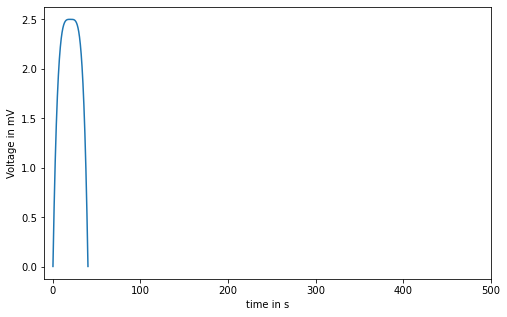

In [6]:
def r_wave(t):
    return -0.0000156 * (t - 20)**4 + 2.5


x = np.linspace(0, 40, 1000)
y = np.vectorize(r_wave)(x)

plt.plot(x, y)
plt.ylabel("Voltage in mV")
plt.xlabel("time in s")
plt.xlim(-10, 500)
plt.show()

In [7]:
a = np.interp(np.max(y), x, y)
a

1.0368793177015738

The heart's activity may be summarized as a cardiac cycle - a repetitive biphase pattern. The two phases are called systole and diastole. The systole is remarkably shorter in its duration, and it is when the contraction occurs. The diastole is the heart's rest - where relaxation (and depolarization) occurs.<br>

The library <code>scipy.misc.electrocardiogram</code> offers a convenient way to plot an ECG. The <code>electrocardiogram()</code> object is a one-dimensional <code>ndarray</code> of a large size (108000 items) that represent the y values. Therefore we plot the time (x axis) by creating a range of x's which is as long as the ECG 1D array. Pay attention to the <code>fs</code> variable. This is the parameter of frequency. It can be found in other scipy functions such as scipy.signal.csd or scipy.signal.welch.<br>
The built-in electrocardiogram of the <code>scipy</code> library is sampled at 360 Hz (360 array items per second) and this is why we calculate the <code>time</code> by dividing the length of the electrocardiogram array by the frequency.<br>

In [8]:
ecg = electrocardiogram()
print(ecg.shape, ecg.mean(), ecg.std())

(108000,) -0.16510875 0.5992473991177294


We assign the sample ECG to a variable called <code>ecg</code>. Immediately we may print its size, the mean value of the array and the standard deviation.<br>
Could we safely assume that because the mean value is negative (but larger than $-1$), therefore the electrode from which the ECG was produced was rather distanced from the heart because it captured a distancing electrical vector? Well, not really.<br>
The size (or length) of the ECG array is 108000. If we divide it by 360, this is 300 seconds or 5 minutes of recording.

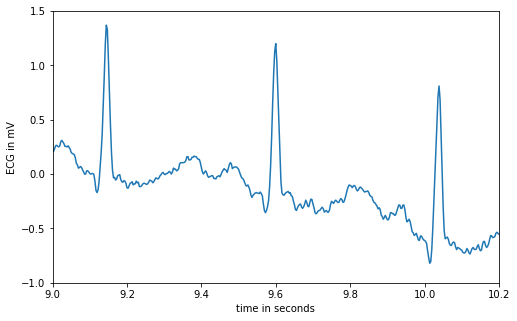

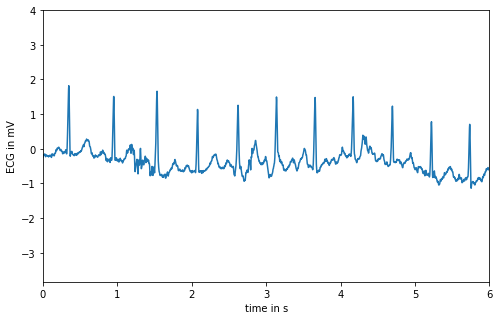

In [9]:
fs = 360  # frequency (Hz - cycles per second)

time = np.arange(ecg.size) / fs  # time = 300

plt.plot(time, ecg)
plt.xlabel("time in seconds")
plt.ylabel("ECG in mV")
plt.xlim(9, 10.2)  # cuts off 1 second of the recording
plt.ylim(-1, 1.5)  # we can scale this so as to match the voltage of real-life ECG paper for more readability
plt.show()

plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(0, 6)  # a range of 6 seconds
# plt.ylim(-2, 1.5) -> commenting this code so as to visualize the vertical fluctuations

plt.show()


Look at the second plot. It often happens that the R-peaks are not well aligned and there are several reasons about that. A chest/finger electrode might easily slip off. If the skin area was not well cleaned (with ethanol and subsequently a saline solution for better conductivity), it could disturb the reading as well (and make it less informative). In practice, **at most** one out of six precordial leads may look like garbage. :)<br><br>
Have you ever taken somebody's pulse - at their wrist or neck? Some tutors recommend to palpate pulse for the duration of at least 30 seconds whilst looking at a stopwatch - then you multiply by 2. As a compromise - measure for 15 seconds, then multiply by 4 (longer is better so as to capture any skipped beats or arrhythmia).<br>
A standard ECG strip may span 10 seconds, 2.5 seconds or less. Yet it returns a calculation of the person's heartbeat everytime. Looking at the above plot, let's try and calculate the heart rate:<br>
For $ 6 $ seconds, 11 R-peaks are observed.<br>
$$ HR = 11 * \frac{60}{10} $$<br>
$$ HR = 110 $$

There is a scipy function that finds peaks in a plot, array, etc. Let's try it out:

In [10]:
ecg_peaks = find_peaks(ecg)  # finds peaks within the 1D array
# print(ecg)
print(len(ecg))  # verifies the array size
print(ecg_peaks)

108000
(array([     4,      9,     16, ..., 107969, 107981, 107988]), {})


Looks like the <code>find_peaks</code> function returns a tuple which contains 2 items: an array and an empty dictionary.<br>
The entire array is, of course, not printed, but it looks like a sequence of growing integers which definitely **do not** represent voltage! This is an array of *indices*. Let's assign a name to it and find out how large it is:

In [11]:
indices = ecg_peaks[0]
print(len(indices))

14778


Suppose we have a 5 minute ECG with an average heart rate of 110. This should make for approximately 550 R-peaks, if there is a normal QRS complex every time the heart goes into systole.<br>
Let's find out what the first 100 peaks in <code>ecg_peaks</code> represent:

In [12]:
for i in indices[:100]:
    print(ecg[i], end=", ")

-0.17, -0.15, -0.175, -0.205, -0.205, -0.205, -0.185, -0.195, -0.145, -0.16, -0.03, 0.015, 0.045, -0.02, -0.07, -0.09, -0.085, -0.03, 1.82, -0.105, -0.075, -0.14, -0.15, -0.13, -0.11, -0.085, -0.06, 0.115, 0.235, 0.28, 0.255, 0.25, 0.245, -0.12, -0.2, -0.225, -0.18, -0.205, -0.175, -0.09, -0.09, -0.04, -0.105, -0.15, -0.28, -0.305, -0.3, -0.26, 1.51, -0.315, -0.26, -0.33, -0.3, -0.275, -0.335, -0.35, -0.34, -0.285, -0.04, -0.01, -0.01, 0.11, 0.125, 0.02, -0.04, -0.305, -0.325, 0.01, -0.33, -0.41, -0.215, -0.275, -0.31, -0.33, -0.665, -0.51, -0.525, 1.66, -0.75, -0.74, -0.8, -0.755, -0.735, -0.67, -0.605, -0.555, -0.445, -0.415, -0.31, -0.475, -0.59, -0.645, -0.61, -0.62, -0.545, -0.485, -0.475, -0.49, -0.64, -0.63, 

It looks as though the program regards negative values as peaks in and of themselves. Could these actually be **local** maxima? Let us determine the maximum value of the array (i.e. the most positive voltage). Let us then try and filter for positive values larger than 1 mV only when looking for peaks.

In [13]:
np.max(ecg)

3.65

In [14]:
ecg_peaks_filtered = find_peaks(ecg, height=[1.25, 3.65])
length = len(ecg_peaks_filtered[0])
length

558

There are 690 peaks in the range (1.25, 3.65) within the 1D array. If we assume these are R-peaks:

In [15]:
print(length // 5)

111


In adults, a heartrate this rapid is regarded as tachycardia. Or could be owing to artifacts or taller T-waves that the program regarded as peaks. In fact, this heart rate is very close to the 110 bpm we calculated a few blocks of code earlier.<br>
To rationalize the number range of choice, reference <a href="https://ecgwaves.com/topic/ecg-normal-p-wave-qrs-complex-st-segment-t-wave-j-point/">this<sup>7</sup></a>.<br>
3.65 mV looks too high for a normal ECG. Let's find where its located (by index) and plot the few seconds when this peak occurred.

In [16]:
print(list(ecg).index(3.65))

15306


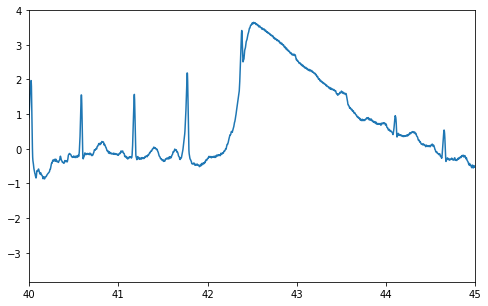

In [17]:
plt.plot(time, ecg)
plt.xlim(15306 // 360 - 2, 15306 // 360 + 3)
plt.show()

This maximum is an artifact. These are quite common. Per <code>scipy.misc.electrocardiogram</code>'s documentation, a 5-minute long ECG was used by the library. An artifact usually originates from dislocation of the electrode upon a patient's sudden motion. In fact, 3.65 really does qualify for an artifacial finding, because in comparison to the *normal* QRS complexes, it stands out. Had it been an actual R-peak, it would indicate a left ventrical hypertrophy which is often found in hypertonic patients.

## Neurokit2
<code>neurokit2</code> offers a sophisticated way to generate an ECG. <code>nk.signal_plot(simulated_ecg, sampling_rate)</code>. Let us plot a sample simulated ECG 

<class 'numpy.ndarray'>
300


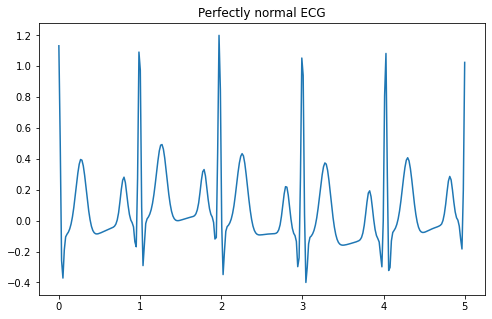

In [18]:
duration = 5

simulated_ecg = nk.ecg_simulate(duration=5, sampling_rate=60, heart_rate=60)
# nk.signal_plot(simulated_ecg, sampling_rate=60)
print(type(simulated_ecg))
# print(simulated_ecg)
print(len(simulated_ecg))

time = np.linspace(0, duration, len(simulated_ecg))
# print(time)
plt.plot(time, simulated_ecg)
plt.title("Perfectly normal ECG")
plt.show()

A quick way to determine whether two variables are independent from each other is to "invert" your graph. Go wild, exchange the x and y. Demonstration:

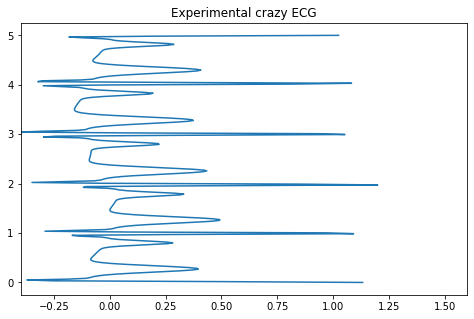

In [19]:
plt.plot(simulated_ecg, time)
plt.xlim(-0.4, 1.6)
plt.title("Experimental crazy ECG")
plt.show()

Despite the imperfect scaling which bans me from saying that the *Experimental crazy ECG* is a 90-degree clockwise rotation of the previous picture, it demonstrates that ECG is not time-dependent. Time is just used to judge on part of the ECG's normality. The other important factor is voltage.

In [20]:
time_list = list(time)
simulated_list = list(simulated_ecg)

"""Using a list comprehension to pair the time points (x) with the ECG values (y),
then parsing them into a NumPy array"""

ecg_points = np.array([(time_list[x], simulated_list[x]) for x in range(len(time))])
print(len(ecg_points))

300


Let's find out whether we may used a familiar method to interpolate/extrapolate from an ECG.<br>
Extrapolation and interpolation are both used to estimate hypothetical values for a variable based on other observations. There are a variety of interpolation and extrapolation methods based on the overall trend that is observed in the data. These two methods have names that are very similar. We will examine the differences between them.<sup>11</sup><br>
For both methods, we assume a few things. We have identified an independent variable and a dependent variable. Through sampling or a collection of data, we have a number of pairings of these variables. We also assume that we have formulated a model for our data. This may be a least squares line of best fit, or it could be some other type of curve that approximates our data. In any case, we have a function that relates the independent variable to the dependent variable.<sup>11</sup><br><br>
Interpolation function<sup>13</sup>:

<ipython-input-21-15f34a27ef7e>:15: RankWarning: Polyfit may be poorly conditioned
  interpolate_polynomial(ecg_points, 150, 0, 5)


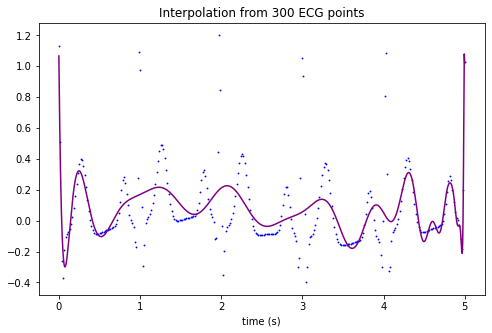

In [21]:
def interpolate_polynomial(array, degree, min_x, max_x):
    x = array[:, 0]
    y = array[:, 1]
    coefficients = np.polyfit(x, y, degree)
    poly = np.poly1d(coefficients)
    plot_x = np.linspace(min_x, max_x, 1000)
    plot_y = poly(plot_x)
    plt.plot(plot_x, plot_y, c="purple")
    plt.scatter(x, y, c="blue", s=0.7)
    plt.title(f"Interpolation from {len(array)} ECG points")
    plt.xlabel("time (s)")
    plt.show()


interpolate_polynomial(ecg_points, 150, 0, 5)

The <code>polyfit</code> function returns the coefficients for a polynomial of a desired degree $n$ that is the best fit for the data in $ecg\_points$.<br>
The code run right above is an *interpolation*, because we do not 'outrun' the initial temporal range (5 seconds).<br>
I might never achieve a perfect interpolation. By definition, as seen above, we have an independent variable (time) and a dependent one. However, the chief dependancy of ECG is not time, but the heart's anatomical structure, its conductivity, which, on the other hand, depend on one's endocrine and metabolical status. This would be plotted on a whole new type of graph.

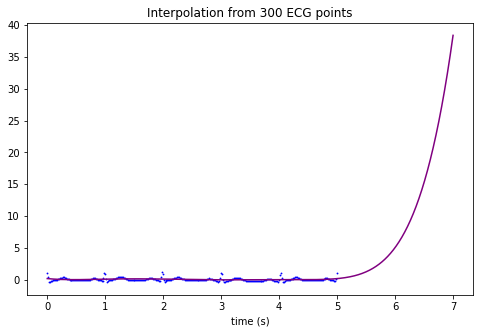

In [22]:
interpolate_polynomial(ecg_points, 7, 0, 7)

As can be seen, extrapolation for just 2 seconds longer than our sample couldn't have been worse. Why is that? An ECG's main purpose is to give instantaneous orientation as to what might be wrong. An ECG result may be falsely negative for an infarction, for example. For many medically significant conditions, ECG alone is not confirmatory. Many abnormalities, such as heart enlargement, are confirmed by imaging methods.<br>
ECG patterns are obvious, but before they became official, they were confirmed by thorough research. Therefore we always interpret ECGs in a context. A computer can learn to interpret ECGs, but somewhere lurks the dangers of hyperdiagnostics. A portable and accessible ECG in your pocket sounds great, but there's a risk this might turn into defensive medicine - and there are few benefits thereof, if any<sup>16</sup>.

<code>Neurokit2</code> offers a marvellous opportunity to locate the peak of any wave.

In [23]:
# Retrieve ECG data from data folder
ecg_signal = nk.data(dataset="ecg_3000hz")['ECG']
# Extract R-peaks locations
_, rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=3000)

print(rpeaks)

values = rpeaks["ECG_R_Peaks"]

for i in values:
    print(ecg_signal[i])

{'ECG_R_Peaks': array([ 3000,  6355,  9851, 13396, 16757, 20188, 23343, 26356, 29150,
       31990, 35314, 38921, 42407, 45714, 49272])}
1.046295166
1.10244751
1.116790771
1.064605713
1.052856445
1.1222839359999999
1.017303467
1.0220336909999999
1.001434326
1.048583984
1.095123291
1.11831665
1.051177979
1.11114502
1.128997803


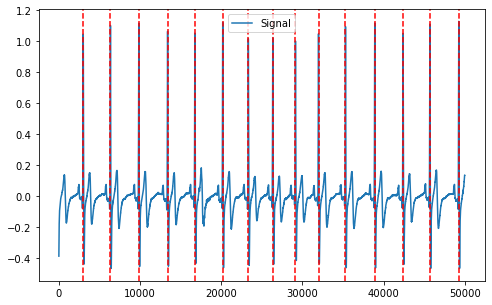

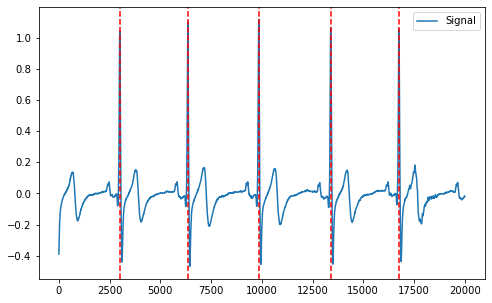

In [24]:
# Visualize R-peaks in ECG signal
plot = nk.events_plot(rpeaks['ECG_R_Peaks'], ecg_signal)

# Zooming into the first 5 R-peaks
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:5], ecg_signal[:20000])

In [25]:
# _, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=3000)
# # print(waves_peak)

# ecg_signal_to_list = list(ecg_signal)
# x_axis_for_ecg_signal = np.array([i for i in range(len(balo))])

# plt.plot(x_axis_for_ecg_signal, ecg_signal_to_list)
# plt.show()

Let's analyze the above data for any sinus arrhythmia. Arrhythmias are divided into two main categories: supraventricular and ventricular. A subtype of the supraventricular arrhythmias are sinus node arrhythmias, or shorter - sinus arrhythmia. This is when the SA node transmits *irregular* signals.<br><br>
By definition:<br>
"The ECG criteria to diagnose sinus arrhythmia is a variation of the R-R interval, from one beat to the next, of at least 0.12 seconds, or 120 milliseconds."<sup>14</sup><br><br>
Since the signal is sampled at 3000 Hz, then we have to divide the time units of the array to 3000 and they'll be converted to seconds. Let's calculate the RR intervals first, and then analyze the differences between them.<br>
We still have the above statement active: <code>values = rpeaks["ECG_R_Peaks"]</code>, with *values* being the temporal locations of the R-peaks.

In [26]:
rr_intervals = []

for index, value in enumerate(values):
    if index == len(values) - 1:
        break
    current_rr = values[index+1] - values[index]
    rr_intervals.append(current_rr)
    
print(rr_intervals)

[3355, 3496, 3545, 3361, 3431, 3155, 3013, 2794, 2840, 3324, 3607, 3486, 3307, 3558]


In [27]:
"""Conversion to seconds"""
rr_int_seconds = [round(r/3000, 3) for r in rr_intervals]
# rr_int_seconds

To figure out if there's a difference larger than 120 milliseconds, we have to find the difference between the minimal and the maximal duration:

In [28]:
print(max(rr_int_seconds) - min(rr_int_seconds))

0.2709999999999999


The answer is 271 ms, so there is at least one prolongation of the RR interval.

ECG is also excellent at demonstrating other sorts of abnormalities - such as infarction, the initiation of one, or the long-term consequences of it.<br>
Noticeably, concave waves (and peaks) are more common than downpointing peaks or convexities.<br>
<img src="ST-depression.png" width=30% height=30%><br>
When we have a normal ECG, we speak of the ST segment as of an isoelectric sector ($ 0x + b$, $ b = 0 $). Whenever this sinks under the zero and remains flat (or not so flat), it's called a depression. The contrary is an elevation. An alteration of a sector that normally must be isoelectric, witnesses for an ongoing infarction.

## Final word
ECG is a fast and cheap way to rule out certain conditions and take others into consideration. ECG is a great discoverer of conductive and rhythmic disorders. Thanks to its accessibility, physicians have been able to examinate countless numbers of people. Having been collecting data from so many age groups, ethnicities and medical backgrounds, scientists have been able to profile the ECG of healthy persons - and therefore identify abnormalities. Only the future will show if ECG will step into our pockets as an affordable means of routine screening - and whether we'll benefit from it. :)

## <i>References and Sources:</i>
1) https://www.vattenhallen.lth.se/fileadmin/vattenhallen/images/mediconalley/postrar_michaela/ENG_A_little_more_about_leads_LL.pdf - Jenny Bengtsson, Michaela Westerberg, Monica Almqvist, Lund University, Faculty of Engineering<br>
2) https://www.nottingham.ac.uk/nursing/practice/resources/cardiology/function/bipolar_leads.php<br>
3) https://aimcardio.com/blog/12-lead-placement-guide-with-diagram/<br>
4) https://www.msdmanuals.com/<br>
5) https://geekymedics.com/understanding-an-ecg/<br>
6) https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.electrocardiogram.html#scipy.misc.electrocardiogram<br>
7) https://ecgwaves.com/topic/ecg-normal-p-wave-qrs-complex-st-segment-t-wave-j-point/<br>
8) https://www.ezmedlearning.com/blog/conduction-system<br>
9) https://www.intmath.com/blog/mathematics/math-of-ecgs-fourier-series-4281<br>
10) First Derivative of the Electrocardiogram (Paul H. Langner, Jr., M.D., F.A.C.P., and David B. Geselowitz, Ph.D.)<br>
11) Makowski, D., Pham, T., Lau, Z. J., Brammer, J. C., Lesspinasse, F., Pham, H., Schölzel, C., & S H Chen, A. (2020). NeuroKit2: A Python Toolbox for Neurophysiological Signal Processing. Retrieved May 15, 2021, from https://github.com/neuropsychology/NeuroKit<br>
12) https://www.thoughtco.com/extrapolation-and-interpolation-difference-3126301<br>
13) Math for Devs Course by Y. Darakchiev, SoftUni OOD<br>
14) https://www.healio.com/<br>
15) https://www.nhs.uk<br>
16) WikiPedia